## Problem Statement
The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. 
- Apply EDA 
- statistical methods 
- Machine learning algorithms<br>
in order to get meaningful information from it. 

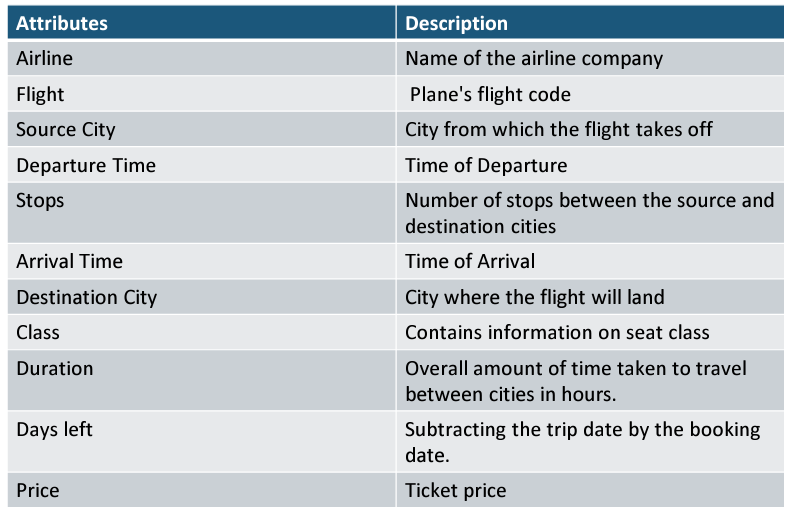

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [8]:
df = pd.read_csv('Flight_Booking.csv')

In [9]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
df.drop(columns= ['Unnamed: 0'], inplace = True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df.shape

(300153, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [13]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Exploratory Data Analysis

In [14]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [15]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [23]:
for col in cat_cols:
    unique_val = df[col].unique()
    print(f"""
    Unique Values for feature {col} :
                          {unique_val}
    Total Unique Values : {len(unique_val)}
    """)


    Unique Values for feature airline :
                          ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
    Total Unique Values : 6
    

    Unique Values for feature flight :
                          ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
    Total Unique Values : 1561
    

    Unique Values for feature source_city :
                          ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
    Total Unique Values : 6
    

    Unique Values for feature departure_time :
                          ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
    Total Unique Values : 6
    

    Unique Values for feature stops :
                          ['zero' 'one' 'two_or_more']
    Total Unique Values : 3
    

    Unique Values for feature arrival_time :
                          ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
    Total Unique Values : 6
    

    Unique Values fo

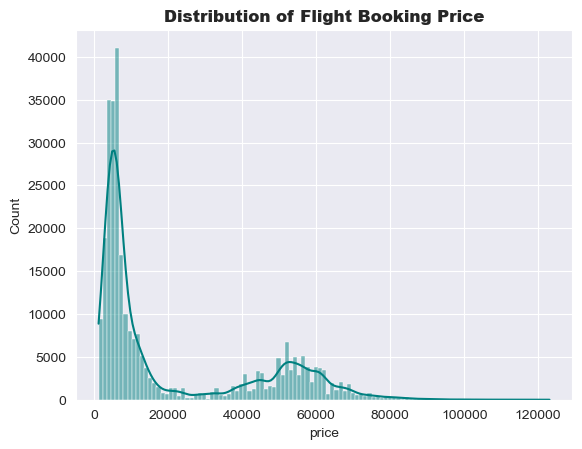

In [30]:
##target column
sns.histplot(df['price'], color = 'teal', kde = True)
plt.title('Distribution of Flight Booking Price', weight = 'black')
plt.show()

In [178]:
def price_dist(column):
    
    ## computing no. of columns and rows for subplot
    categories = df[column].unique()
    unique = len(categories)
        
    #plt.figure(figsize = (12,8))
    #sns.histplot(data = df, x = 'price', hue= column)
    #plt.show()
    
    ncols = 3
    nrows = int(np.ceil(unique/ncols))
    
    ## creating subplots
    plt.subplots(nrows = nrows, ncols= ncols, figsize = (12,8))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    for i in range(unique):
        num = i+1
        mean = df.groupby(by = column).mean().loc[categories[i], 'price']
        plt.subplot(nrows, ncols, num)
        sns.histplot(df.loc[df[column] == categories[i]]['price'], kde = True, color = colors[i])
        plt.axvline(x = mean, linestyle = '--', color = 'r')
        plt.title(f"Distribution of Flight Booking Price" + "\n" + f"for {column} {categories[i]}")
        plt.text(x = mean+500, y = 600, s ='Mean Price' + '\n'+ str(np.round(mean, 2)), weight = 'black', rotation = 'vertical')
    
    plt.subplots_adjust(wspace = 0.3,
                       hspace = 0.4)

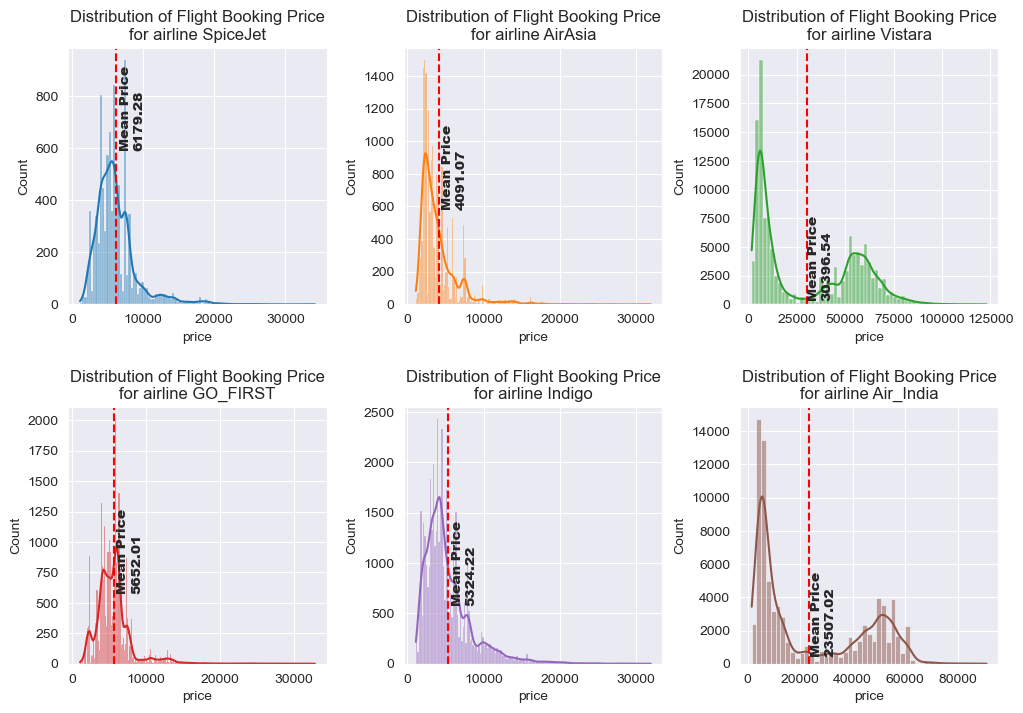

In [179]:
price_dist('airline')

In [193]:
## creating 'route' column
df['route'] = df['source_city'] + ' to ' + df['destination_city']

In [194]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai


In [327]:
def count_plot(column):
    sns.countplot(data = df, x = column, order = df[column].value_counts().index, palette='Set2')
    for x, y in enumerate(df[column].value_counts().values):
        plt.text(x, y/2, s = y, ha = 'center', weight = 'bold', rotation = 'vertical')
    plt.xticks(rotation = 90)
    plt.title(f"Total number of flights per {column}")
    

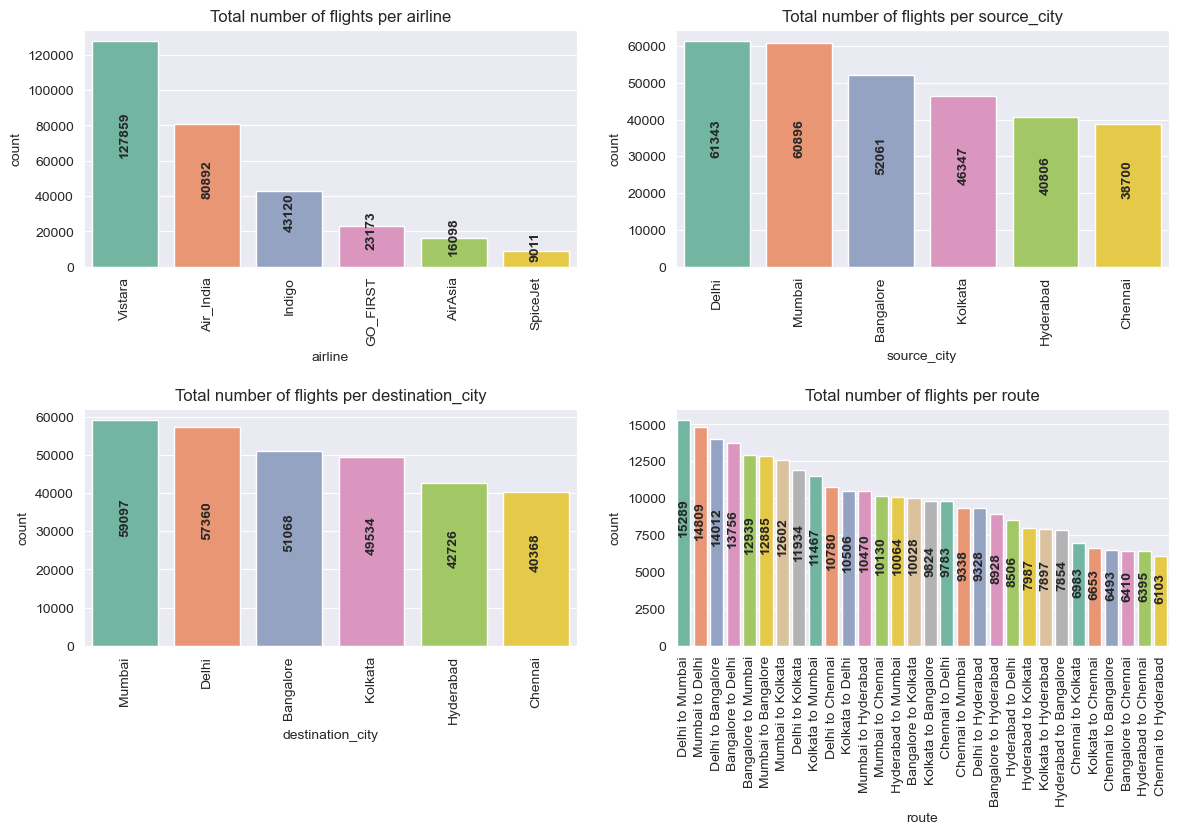

In [333]:
plt.subplots(2 ,2, figsize = (14,8))
plt.subplot(221)
count_plot('airline')

plt.subplot(222)
count_plot('source_city')

plt.subplot(223)
count_plot('destination_city')

plt.subplot(224)
count_plot('route')

plt.subplots_adjust(hspace = 0.6)
plt.show()

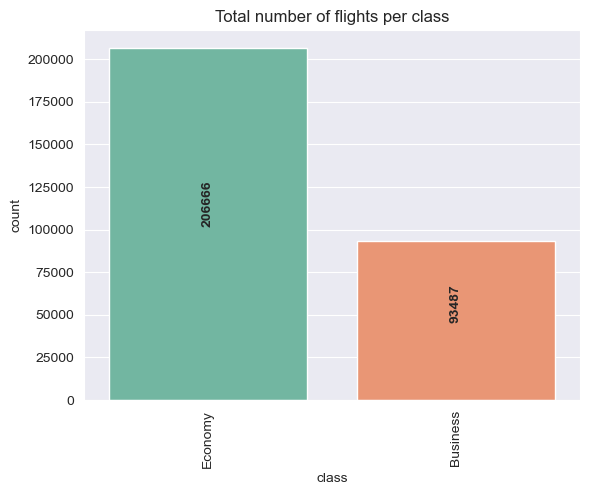

In [335]:
count_plot('class')

In [340]:
crosstab = pd.crosstab(index = df['airline'],
           columns = df['class'],
           margins= True).sort_values(by= 'All', ascending= False)
crosstab

class,Business,Economy,All
airline,,,
All,93487,206666,300153
Vistara,60589,67270,127859
Air_India,32898,47994,80892
Indigo,0,43120,43120
GO_FIRST,0,23173,23173
AirAsia,0,16098,16098
SpiceJet,0,9011,9011


In [347]:
 crosstab.loc['Vistara', 'Business']/crosstab.loc['Vistara', 'All']

0.473873563847676

In [350]:
crosstab.columns

Index(['Business', 'Economy', 'All'], dtype='object', name='class')

In [428]:
def cat_freq_plot(index, column):
    
    crosstab = pd.crosstab(index = df[index],
                           columns = df[column],
                           margins= True).sort_values(by= 'All', ascending= False)
    
    cat_len = len(crosstab.index[1:])
    col_cat = len(crosstab.columns[:-1])
    
    for y, idx in enumerate(crosstab.index[1:]):
        
        width = []
        for col in crosstab.columns[:-1]:
            wd = (crosstab.loc[idx, col]/crosstab.loc[idx, 'All'])
            width.append(wd)
            
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']   
        left = 0
        for j in range(col_cat):
            
            plt.barh(y = idx, width = width[j], left = left, color = colors[j])
            left = left + width[j]
            
        #plt.barh(y = idx, width = width[0], color = 'teal')
        #plt.barh(y = idx, width = width[1], color = 'darkseagreen',
                 #left= width[0])
        
        
        
        #x_pos = 0
        #for i in range(col_cat):
            
            #x_pos = x_pos + width[i]/2
            
            #if width[i]>0:
                #s = str(np.round(width[i],2)*100)
            #else:
                #continue 
                
            #plt.text(x = x_pos, y = y, s = s + '%')
            
            #x_pos = x_pos*2
            
        plt.ylabel(index)
        plt.xlabel('Proportion')
        plt.xticks(np.arange(0,1.05,0.05), rotation = 90)
        plt.legend(crosstab.columns[:-1])
        plt.title(f"Proportion of {column} for {index}", weight = 'black')
            
        
    
    
    
            

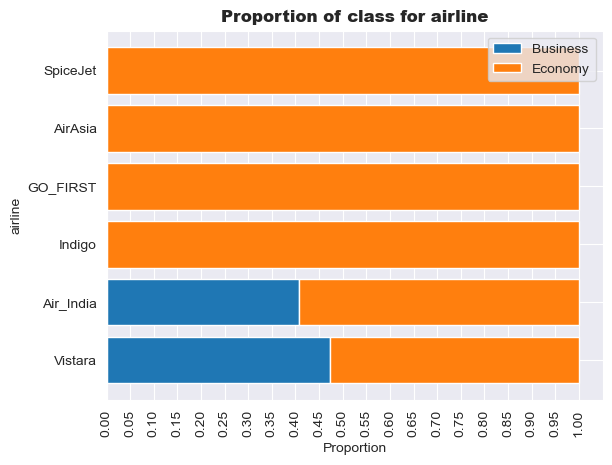

In [429]:
cat_freq_plot('airline', 'class')

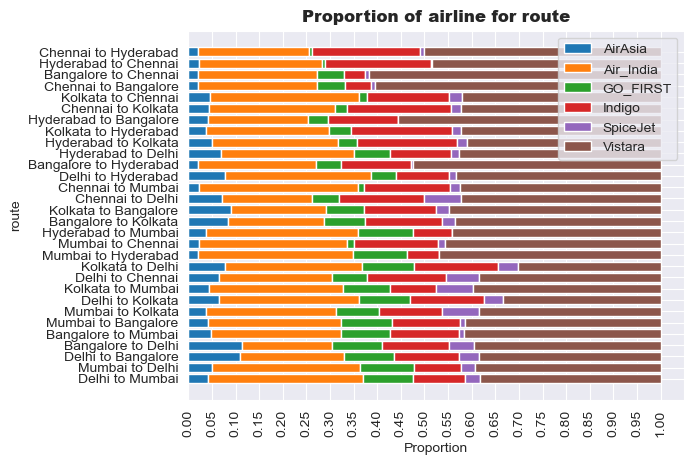

In [430]:
cat_freq_plot('route', 'airline')

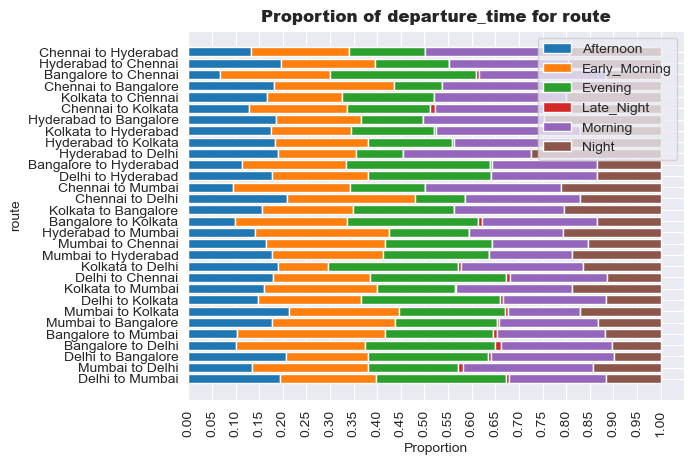

In [432]:
cat_freq_plot('route', 'departure_time')

In [ ]:
sns.catplot()

In [291]:
route_df = df.groupby(by = 'route').mean()
route_df['frequency'] = 0
for i in range(len(route_df)):
    route_df['frequency'][i] = df.loc[df['route'] == route_df.index[i]]['route'].value_counts()
route_df = route_df.sort_values(by = 'frequency', ascending= False)


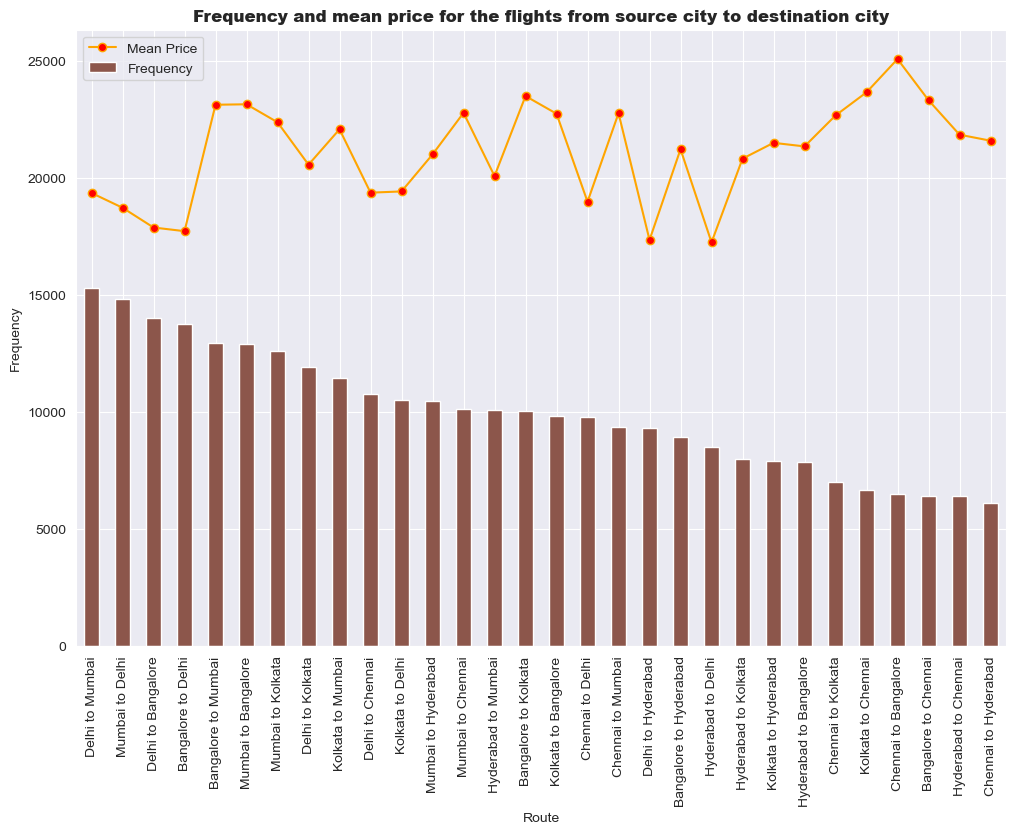

In [294]:
plt.figure(figsize = (12,8))
route_df['frequency'].plot(kind = 'bar', color = '#8c564b', label = 'Frequency')
route_df['price'].plot(kind = 'line', color = 'orange', marker = 'o',mfc = 'r', label = 'Mean Price')
plt.xticks(rotation = 90)
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.legend()
plt.title("Frequency and mean price for the flights from source city to destination city", weight = 'black')
plt.show()

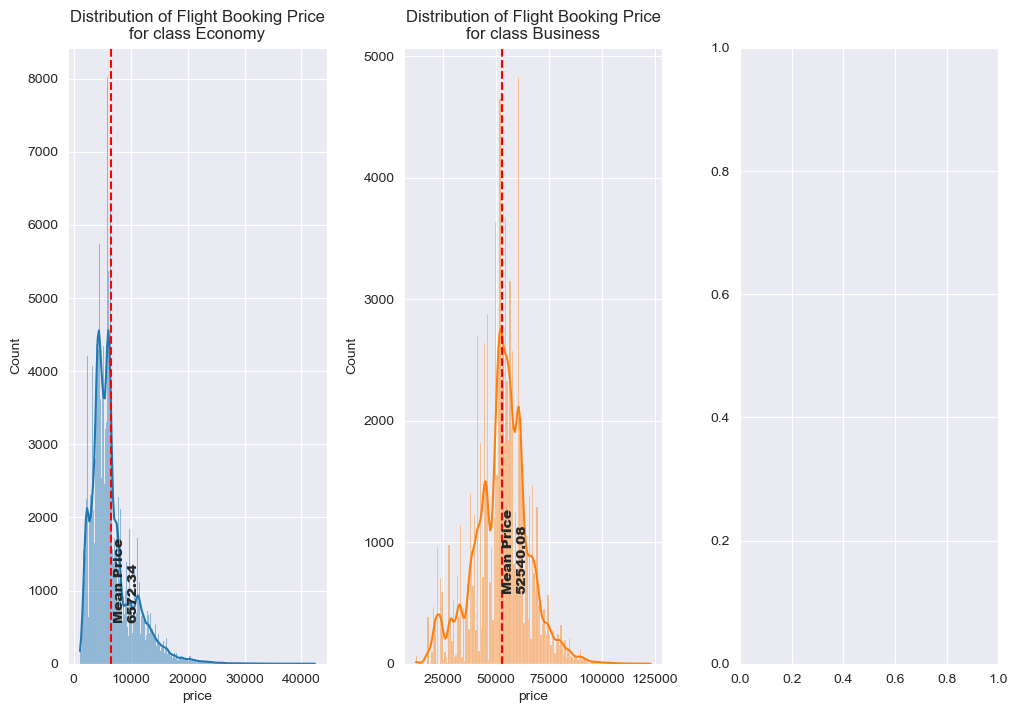

In [296]:
price_dist('class')

In [436]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai


<AxesSubplot:xlabel='duration', ylabel='price'>

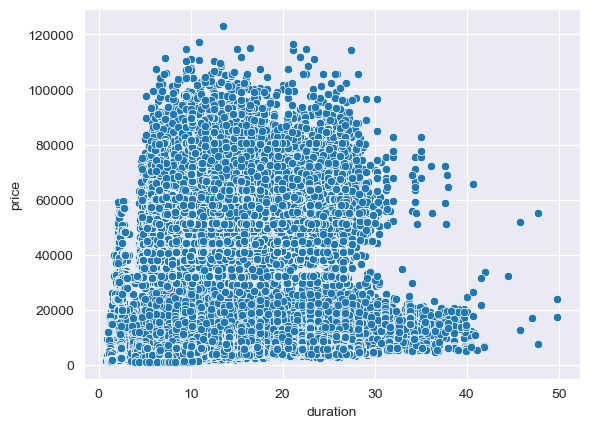

In [448]:
sns.scatterplot(x = 'duration', y = 'price', data = df)

In [450]:
df['days_left'].value_counts().sort_index()

1     1927
2     4026
3     4248
4     5077
5     5392
6     5740
7     5703
8     5767
9     5665
10    5822
11    6417
12    6381
13    6404
14    6349
15    6340
16    6272
17    6419
18    6602
19    6537
20    6502
21    6479
22    6494
23    6401
24    6542
25    6633
26    6573
27    6360
28    6522
29    6397
30    6501
31    6534
32    6585
33    6532
34    6412
35    6291
36    6490
37    6476
38    6512
39    6593
40    6531
41    6525
42    6497
43    6472
44    6436
45    6314
46    6160
47    6069
48    6078
49    6154
Name: days_left, dtype: int64

<AxesSubplot:xlabel='days_left'>

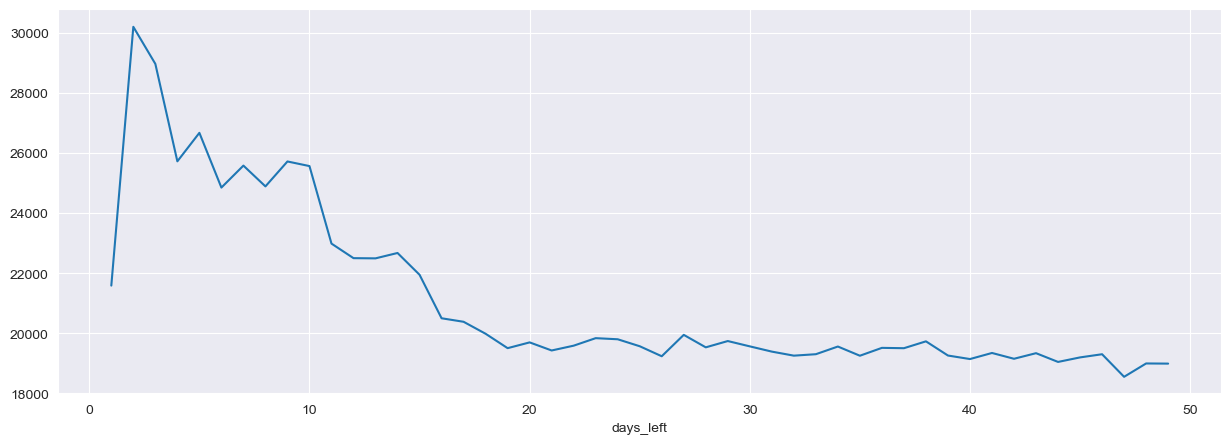

In [457]:
plt.figure(figsize =(15,5))
df.groupby(by = 'days_left').mean()['price'].plot(kind = 'line')

<AxesSubplot:xlabel='days_left', ylabel='price'>

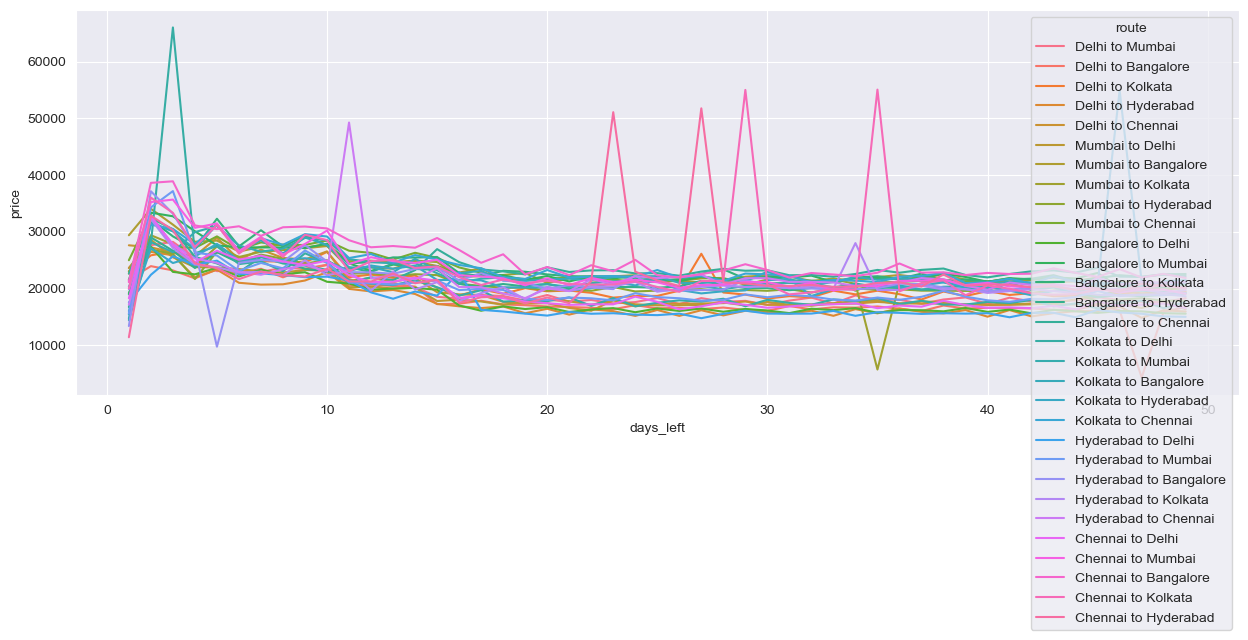

In [467]:
plt.figure(figsize =(15,5))
sns.lineplot(data = df, x = 'days_left', y = 'price', hue = 'route' ,err_style = None)

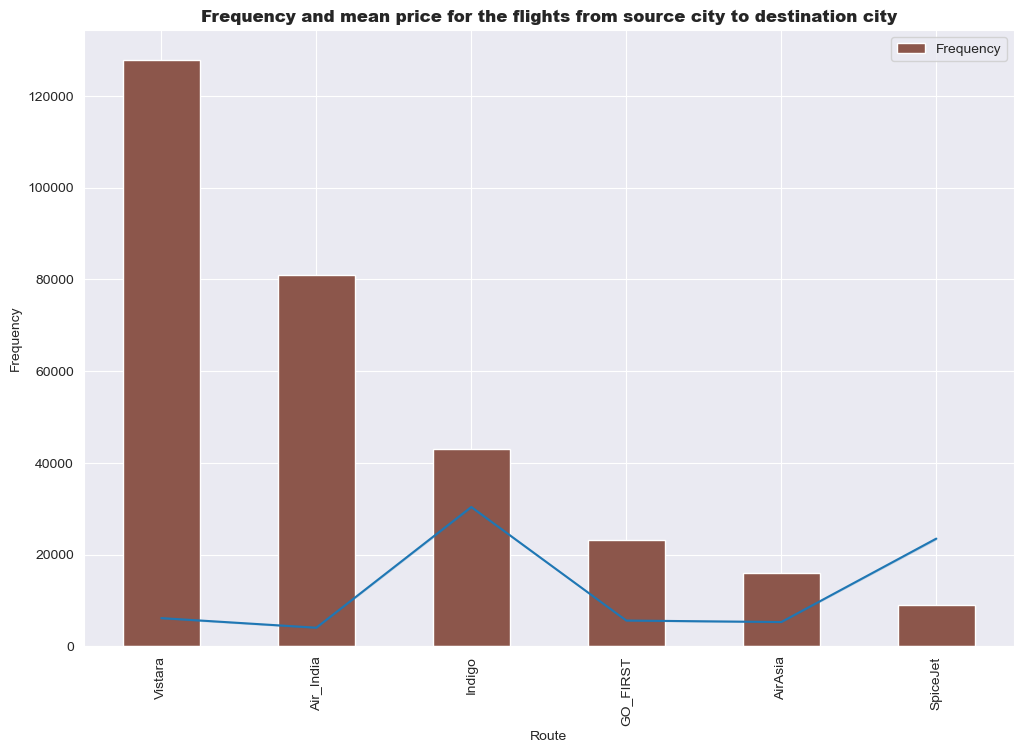

In [460]:
plt.figure(figsize = (12,8))
df['airline'].value_counts().plot(kind = 'bar', color = '#8c564b', label = 'Frequency')
sns.lineplot(data = df, x = 'airline', y = 'price')
plt.xticks(rotation = 90)
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.legend()
plt.title("Frequency and mean price for the flights from source city to destination city", weight = 'black')
plt.show()

<AxesSubplot:xlabel='airline', ylabel='price'>

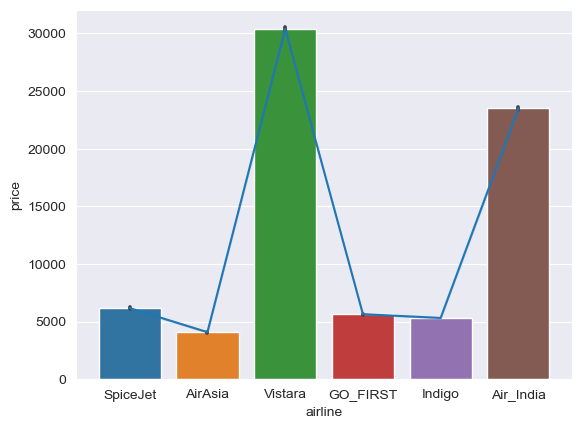

In [463]:
sns.barplot(data = df, x = 'airline', y = 'price')
sns.lineplot(data = df, x = 'airline', y = 'price')